# Project

# Setup

In [1]:
API_KEY = "QBFFL4qysNCwIZFXQgOITE7hf"
API_SECRET = "a9e0yoi1tNCYDF5y4d8tfMORsUCpkRVIafm3uus59E4AlNHoGc"

In [187]:
import tweepy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
trial = pd.read_csv("dataNov25final.csv", index_col=0)
trialtweet = trial

trialtweet = trial['tweet_text'].values

trialtweet[0]

'"All the pixel killers must be in church." - My husband as he\'s waiting for a que in blackops 4'

# Getting data from Twitter

In [14]:
c = tweepy.Cursor(api.search, q="pixel 3", lang="en")
status_store=[]

for status in c.items(10000):
    tid = status.id
    tid_str = status.id_str
    retweeted = status.retweeted
    favorited = status.favorited
    #reply_count = status.reply_count
    #quote_count = status.quote_count
    created_at = status.created_at
    coordinates = status.coordinates
    user_location = status.user.location
    tweet_text = status.text
    fav_count = status.favorite_count
    retweet_count = status.retweet_count
    user_id = status.user.id
    user_name = status.user.name
    user_utc_offset = status.user.utc_offset
    followers_count = status.user.followers_count
    friends_count = status.user.friends_count
    this_tweet = [tid, tid_str, retweeted, favorited, created_at, coordinates, user_location, tweet_text, fav_count, 
                  retweet_count, user_id, user_name, user_utc_offset, followers_count,
                  friends_count]
    status_store.append(this_tweet)
print(len(status_store))
#print(status_store)

893


In [15]:
status_store[:4]

[[1067084600982339584,
  '1067084600982339584',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 56, 9),
  None,
  'Pune, India',
  'Inside Google Marketing: Jabari Hearn explains how the ability to dream — not just data — played a part in launchin… https://t.co/qsn0XPXTCQ',
  0,
  0,
  1018730750261121024,
  'Naitik Mandot',
  None,
  32,
  23],
 [1067084340457365504,
  '1067084340457365504',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 55, 6),
  None,
  '',
  'Night Sight Review: Pixel 3 Lite + The Ultimate Night Mode Upgrade! Webcast https://t.co/OHj7rYoOWC',
  0,
  0,
  1045912528771997696,
  'jiensmicjeak',
  None,
  119,
  692],
 [1067084266654367744,
  '1067084266654367744',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 54, 49),
  None,
  'Mountain View, California',
  'RT @9to5toys: Google’s new Pixel Stand charges your Pixel 3 in style at $40 shipped (50% off) https://t.co/ML1KI1HEIr https://t.co/PPbJp0pX…',
  0,
  1,
  177087369,
  '9to5Google',
  

In [16]:
import pandas as pd
df = pd.DataFrame(status_store)
df.columns = ["tid", "tid_str", "retweeted", "favorited","created_at", "coordinates", "user_location", "tweet_text", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"]

In [17]:
df.shape

(893, 15)

In [18]:
df.tail()

,tid,tid_str,retweeted,favorited,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
888,1066991989919428608,1066991989919428608,False,False,2018-11-26 09:48:08,None,Hyderabad,RT @VenyaGeskin1: Google Pixel 3 Lite is a sim...,0,21,94896121,gokul bhargav.,None,178,196
889,1066991755025936384,1066991755025936384,False,False,2018-11-26 09:47:12,None,Timbó/SC,Google Pixel 3 XL international giveaway! http...,0,0,361813637,Ivan Petermann,None,21,19
890,1066991737938145280,1066991737938145280,False,False,2018-11-26 09:47:08,None,,Will #GetOutoftheRed include the pixel 3 @TMob...,0,0,14925066,Gabe Jesus,None,256,598
891,1066991662621048832,1066991662621048832,False,False,2018-11-26 09:46:50,None,,Google Pixel 3 XL international giveaway! http...,0,0,55408556,Shilton Jonatan,None,254,383
892,1066991623442259969,1066991623442259969,False,False,2018-11-26 09:46:41,None,"Rio de Janeiro, Brazil",Google Pixel 3 XL international giveaway! http...,0,0,104962164,Marcorélio Soares,None,34,477


In [19]:
df.to_csv("dataset1_pixel3nov25_2.csv")

In [18]:
c = tweepy.Cursor(api.search, q="pixel", lang="en")
status_store1=[]

for status in c.items(10000):
    created_at = status.created_at
    coordinates = status.coordinates
    user_location = status.user.location
    tweet_text = status.text
    fav_count = status.favorite_count
    retweet_count = status.retweet_count
    user_id = status.user.id
    user_name = status.user.name
    user_utc_offset = status.user.utc_offset
    followers_count = status.user.followers_count
    friends_count = status.user.friends_count
    this_tweet = [created_at, coordinates, user_location, tweet_text, fav_count, 
                  retweet_count, user_id, user_name, user_utc_offset, followers_count,
                  friends_count]
    status_store1.append(this_tweet)
print(len(status_store1))
#print(status_store)

Rate limit reached. Sleeping for: 835


6478


In [22]:
df1 = pd.DataFrame(status_store1)
df1.columns = ["created_at", "coordinates", "user_location", "tweet_text", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"]

In [25]:
df1.tail()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
6473,2018-11-18 11:11:49,None,"Hope, Indiana",Coloring by numbers is fun with Pixel Art! htt...,0,0,53339713,SherylMcQueenFreeman,None,296,2788
6474,2018-11-18 11:11:40,None,,RT @vivo_malaysia: With V11's Dual Pixel Senso...,0,532,1063878016076472321,ذهني,None,4,0
6475,2018-11-18 11:11:36,None,"Chicago, IL",RT @ohnePixel: 🥳GIVEAWAY TIME🥳\n\nTo win this ...,0,281,103150623,rone,None,654,256
6476,2018-11-18 11:11:31,None,"Vancouver, British Columbia",RT @FieryFN: Naruto Headband Pixel Art\nthis t...,0,5,3265347685,Rehman mann,None,20,118
6477,2018-11-18 11:11:18,None,Salem,@IndiaPOCO 1.Snapdragon 845 Processor 🔥🔥🔥\n\n2...,0,0,732090558106079237,Mersal mohan,None,213,504


In [24]:
df1.to_csv("dataset1_pixelnov19_2.csv")

# Dataset preparation

## Combine data pulled at different time frame

In [25]:
pixel12 = pd.read_csv("dataset1_pixel3nov12.csv", index_col=0)
pixel18 = pd.read_csv("dataset1_pixelnov18_1.csv", index_col=0)

In [26]:
pixel12.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-13 07:03:57,NaN,"New Delhi, India",RT @TechnicalGuruji: Good Morning 🙂...Night Si...,0,127,792702964959813632,💝Chandramani 💝Kumar 💞,NaN,7640,5488
1,2018-11-13 07:03:23,NaN,Nigeria/Ghana,"RT @mohinii_u: Yesterday, I dropped by #GTBank...",0,32,851350928,O,NaN,676,264
2,2018-11-13 07:02:42,NaN,Malaysia,RT @Ashril_92: Damn Pixel 3 😩😭❤️ https://t.co/...,0,9270,1124217710,Farah☁️,NaN,471,287
3,2018-11-13 07:01:36,NaN,"Kurla East, Mumbai",RT @androidcentral: The Google Pixel 3 XL is o...,0,6,4631963172,JAVED SHAIKH(JAFF_!),NaN,96,108
4,2018-11-13 07:00:07,NaN,"Kurla East, Mumbai",RT @androidcentral: No one wants to hide their...,0,3,4631963172,JAVED SHAIKH(JAFF_!),NaN,96,108


In [27]:
print(pixel18.shape)
print(pixel12.shape)

(7001, 11)
(1090, 11)


In [28]:
data12n18 = pd.concat([pixel18,pixel12])

In [29]:
data12n18.shape

(8091, 11)

In [31]:
data12n18.tail()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
1085,2018-11-12 13:16:05,NaN,VENEZUELA,Pixel 3 tips and tricks: Getting the most from...,0,0,388912217,"PC-PLANET, S.A.",NaN,1267,997
1086,2018-11-12 13:15:31,NaN,Geneva,The Pixel 3 is not an iPhone killer. But if yo...,0,0,88403945,Gabriel Hussy 🔁,NaN,2706,1382
1087,2018-11-12 13:15:00,NaN,Kuala Lumpur,RT @WIRED: The Pixel 3 is not an iPhone killer...,0,8,336983384,Kemto,NaN,582,493
1088,2018-11-12 13:14:25,NaN,Pakistan,Google Pixel 3 XL Price And Specification http...,0,0,783964976352460800,Content.PK,NaN,87,20
1089,2018-11-12 13:14:01,NaN,Pakistan,RT @WIRED: The Pixel 3 is not an iPhone killer...,0,8,1060449761084420096,TechGeek2K,NaN,15,45


In [32]:
data12n18f = data12n18.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

In [50]:
data12n18f.shape

NameError: name 'data12n18f' is not defined

## Remove duplicates

In [34]:
data12n18final = data12n18f.drop_duplicates(subset=['tweet_text'], keep='first')

In [35]:
data12n18final.shape

(5266, 11)

In [36]:
data12n18final.to_csv("data12n18final.csv")

In [20]:
pixelNov13_1 = pd.read_csv("dataset1_pixelxlnov13.csv", index_col=0)
pixelNov13_2 = pd.read_csv("dataset1_pixelxlnov13_2.csv", index_col=0)

#pixel12.head()

print(pixelNov13_1.shape)
print(pixelNov13_2.shape)

data13 = pd.concat([pixelNov13_1,pixelNov13_2])

print(data13.shape)

#data1.tail()

dataNov13 = data13.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov13.shape)

dataNov13final = dataNov13.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov13final.shape)

(4779, 11)
(4701, 11)
(9480, 11)
(9480, 11)
(4188, 11)


In [22]:
dataNov13final.to_csv("dataNov13final.csv")

In [37]:
pixelNov17_1 = pd.read_csv("dataset1_pixelxlnov17_1.csv", index_col=0)
pixelNov17_2 = pd.read_csv("dataset1_pixel3nov17_1.csv", index_col=0)

print(pixelNov17_1.shape)
print(pixelNov17_2.shape)

data17 = pd.concat([pixelNov17_1,pixelNov17_2])

print(data17.shape)

dataNov17 = data17.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov17.shape)

dataNov17final = dataNov17.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov17final.shape)

(4918, 11)
(9882, 11)
(14800, 11)
(14800, 11)
(9316, 11)


In [38]:
dataNov17final.to_csv("dataNov17final.csv")

In [48]:
#pixelNov19_1 = pd.read_csv("dataset1_pixelnov19_1.csv", index_col=0)
#pixelNov19_2 = pd.read_csv("dataset1_pixelnov19_2.csv", index_col=0)

pixelNov19_1 = pd.read_csv("dataset1_pixelnov19_1_new.csv", index_col=0)
pixelNov19_2 = pd.read_csv("dataset1_pixelnov19_2_new.csv", index_col=0)

print(pixelNov19_1.shape)
print(pixelNov19_2.shape)

data19 = pd.concat([pixelNov19_1,pixelNov19_2])

print(data19.shape)

dataNov19 = data19.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov19.shape)

dataNov19final = dataNov19.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov19final.shape)

(6479, 18)
(6479, 18)
(12958, 18)
(12958, 18)
(4496, 18)


In [50]:
dataNov19final.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-11-19 05:31:48,NaN,sc,marchieeeeee,RT @Ashril_92: Full Tank Chicken Chop 🤤🤤\n\nCh...,0,600,1159748726,nekbat♡,NaN,1238,396,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-18 21:09:41,NaN,parody,not her !,@xersivx PIXEL PUSSY LMFAOOOOOO,0,0,9.82804650373075E+017,muva. 💋,NaN,1869,516,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-18 17:00:06,NaN,"Portland, OR","""Aiming to be more transparent about ad target...",1,1,619411599,Lytics,NaN,1176,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-11-18 19:09:08,NaN,"40.43729000,-3.680233000","""I agree to receive news, updates, promotions ...",0,0,766929,Miguel Angel Moro,NaN,3225,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-11-19 02:38:20,NaN,"Marylandonia, Yuesei","""I don't feel like getting out my tablet or sc...",0,0,12449372,A. Lee,NaN,48,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataNov19fin = dataNov19final.drop(columns = ["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18" ])

In [53]:
dataNov19fin.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-19 05:31:48,NaN,sc,marchieeeeee,RT @Ashril_92: Full Tank Chicken Chop 🤤🤤\n\nCh...,0,600,1159748726,nekbat♡,NaN,1238
2,2018-11-18 21:09:41,NaN,parody,not her !,@xersivx PIXEL PUSSY LMFAOOOOOO,0,0,9.82804650373075E+017,muva. 💋,NaN,1869
4,2018-11-18 17:00:06,NaN,"Portland, OR","""Aiming to be more transparent about ad target...",1,1,619411599,Lytics,NaN,1176,719
6,2018-11-18 19:09:08,NaN,"40.43729000,-3.680233000","""I agree to receive news, updates, promotions ...",0,0,766929,Miguel Angel Moro,NaN,3225,99
8,2018-11-19 02:38:20,NaN,"Marylandonia, Yuesei","""I don't feel like getting out my tablet or sc...",0,0,12449372,A. Lee,NaN,48,151


In [54]:
dataNov19fin.shape

(4496, 11)

In [55]:
dataNov19fin.to_csv("dataNov19final.csv")

In [49]:
pixelNov25_1 = pd.read_csv("dataset1_pixelxlnov25_1.csv", index_col=0)
pixelNov25_2 = pd.read_csv("dataset1_pixel3nov25_2.csv", index_col=0)

print(pixelNov25_1.shape)
print(pixelNov25_2.shape)

data25 = pd.concat([pixelNov25_1,pixelNov25_2])

print(data25.shape)

dataNov25 = data25.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov25.shape)

dataNov25final = dataNov25.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov25final.shape)

(10000, 15)
(893, 15)
(10893, 15)
(10893, 15)
(6465, 15)


In [57]:
dataNov25fin = dataNov25final.drop(columns = ["tid", "tid_str", "retweeted", "favorited"])

In [60]:
dataNov25fin.shape

(6465, 11)

In [61]:
dataNov25fin.to_csv("dataNov25final.csv")

In [62]:
pixelNov13final = pd.read_csv("dataNov13final.csv", index_col=0)
pixelNov12n18final = pd.read_csv("data12n18final.csv", index_col=0)
dataNov17final = pd.read_csv("dataNov17final.csv", index_col=0)
dataNov19final = pd.read_csv("dataNov19final.csv", index_col=0)
dataNov25final = pd.read_csv("dataNov25final.csv", index_col=0)

datacom = pd.concat([pixelNov13final,pixelNov12n18final, dataNov17final, dataNov19final, dataNov25final])

print(datacom.shape)

datafin = datacom.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(datafin.shape)

datafinal = datafin.drop_duplicates(subset=['tweet_text'], keep='first')

print(datafinal.shape)

(29731, 11)
(29731, 11)
(25826, 11)


In [63]:
datafinal.to_csv("finaldataset.csv")

# Exploratory data analysis

In [135]:
Data_pixel = pd.read_csv("dataNov25final.csv", index_col=0)

In [136]:
Data_pixel.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-25 16:43:50,NaN,"Missouri, USA","""All the pixel killers must be in church."" - M...",0,0,1044482040027115520,lisamarie81,NaN,211,392
1,2018-11-25 06:42:34,NaN,"Lagos, Nigeria","""Allah has the picture, we've only got a pixel...",0,0,1782823832,Sodrudeen,NaN,37,166
2,2018-11-26 00:27:40,NaN,San Francisco/New York,"""Allow me to make that dinner reservation for ...",32,11,1344951,WIRED,NaN,10351712,345
3,2018-11-26 00:28:35,NaN,"Lyon, France","""Allow me to make that dinner reservation for ...",0,0,44607361,ben carpano,NaN,1053,701
4,2018-11-26 00:29:25,NaN,Geneva,"""Allow me to make that dinner reservation for ...",0,0,88403945,Gabriel Hussy 🔁,NaN,2710,1383


In [137]:
Data_pixel = Data_pixel.drop(columns = ["created_at", "coordinates", "user_location", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"])

In [138]:
Data_pixel.head()

,tweet_text
0,"""All the pixel killers must be in church."" - M..."
1,"""Allah has the picture, we've only got a pixel..."
2,"""Allow me to make that dinner reservation for ..."
3,"""Allow me to make that dinner reservation for ..."
4,"""Allow me to make that dinner reservation for ..."


In [139]:
Data_pixel.shape

(6465, 1)

In [140]:
Data_pixel.head()

,tweet_text
0,"""All the pixel killers must be in church."" - M..."
1,"""Allah has the picture, we've only got a pixel..."
2,"""Allow me to make that dinner reservation for ..."
3,"""Allow me to make that dinner reservation for ..."
4,"""Allow me to make that dinner reservation for ..."


## Average length of tweets

In [141]:
Data_pixel['pre_clean_len'] = [len(t) for t in Data_pixel.tweet_text]

In [142]:
Data_pixel.shape

(6465, 2)

In [143]:
df = Data_pixel

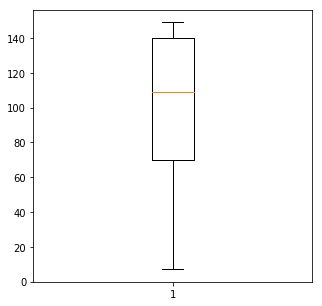

In [144]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [145]:
df.head()

,tweet_text,pre_clean_len
0,"""All the pixel killers must be in church."" - M...",95
1,"""Allah has the picture, we've only got a pixel...",69
2,"""Allow me to make that dinner reservation for ...",90
3,"""Allow me to make that dinner reservation for ...",90
4,"""Allow me to make that dinner reservation for ...",90


In [146]:
df[df.pre_clean_len > 140].head(10)


,tweet_text,pre_clean_len
68,#Splatoon2 #NintendoSwitch Looky what we have ...,143
128,--&gt; The abyss waves back.\n\nthing for @Fle...,143
252,@AndroidAuth @DGiTDaily\nDone all steps ☑️ ☑️\...,144
319,@BestBuy you took money for your pixel 3xl and...,144
402,@DatNaturalHigh try this one. It's the one I'v...,144
505,@Hipsterrrific Because no one will buy Samsung...,144
613,@LAGTVMB It’s not you Jeoff. There’s some doub...,144
1522,@nmiltner Our last 2 phones for the kids were ...,144
1700,@sramkrishna @ebassi I guess some people are u...,144
1703,@stephn_r @madebygoogle Good luck. All the loy...,144


## Look for NULL values

In [147]:
# Check for null values
np.sum(df.isnull().any(axis=1))

0

In [148]:
#drop null values
#training.dropna(inplace=True)
#training.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 10892
Data columns (total 2 columns):
tweet_text       6465 non-null object
pre_clean_len    6465 non-null int64
dtypes: int64(1), object(1)
memory usage: 151.5+ KB


# Data Cleaning

## Decode HTML to general text

In [158]:
# Decoding HTML to general text
from bs4 import BeautifulSoup
sample = BeautifulSoup(df.tweet_text[100], 'lxml')
print(sample.get_text())

#pixel #pixel2 #maldivesislands #malecity # nightlights @ Male, Maldives https://t.co/pqwZ56ZFdb


## Remove '@’

In [159]:
df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [160]:
# Remove '@’mention
import re
re.sub(r'@[A-Za-z0-9]+','',df.tweet_text[85])

'#my_2ndpost\nI Learn Editing From  \nI Edit On  \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

## Remove URL links

In [162]:
# Remove URL links
df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [163]:
re.sub('https?://[A-Za-z0-9./]+','',df.tweet_text[85])

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… '

## remove hashtag / numbers (Remove "#" and retain the text)

In [165]:
# remove hashtag / numbers. Remove "#" and retain the text

df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [167]:
re.sub("[^a-zA-Z]", " ", df.tweet_text[85])

' my  ndpost I Learn Editing From  piximperfect  I Edit On  Photoshop   portraits  portrait  portraits ig   pixel ig  https   t co an xx HonJ'

## Function for Data Cleaning - Can use in Machine Learning pipeline

In [170]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped_text = soup.get_text()
    text_rmat = re.sub(r'@[A-Za-z0-9]+','', souped_text)
    text_rmurl = re.sub('https?://[A-Za-z0-9./]+','',text_rmat)
    text_rmwww = re.sub(r'www.[^ ]+','',text_rmurl)
    text_rmhash = re.sub("[^a-zA-Z]", " ", text_rmwww)
    text_lower = text_rmhash.lower()
    
    # tokenize and join together to remove unneccessary white spaces
    text_words = tok.tokenize(text_lower)
    return (" ".join(text_words)).strip()
testing = df.tweet_text[:10]
test_result = []
for t in testing:
    test_result.append(cleaner(t))
test_result

['all the pixel killers must be in church my husband as he s waiting for a que in blackops',
 'allah has the picture we ve only got a pixel always reassuring',
 'allow me to make that dinner reservation for you google s bot',
 'allow me to make that dinner reservation for you google s bot',
 'allow me to make that dinner reservation for you google s bot',
 'an obsession with pixel perfect rendering is futile',
 'better late than never dailies broken pixel dailies pixelart',
 'come back button masher w pixel art by myself via',
 'candy axe pixel art animation by me requested by',
 'christmas tree pixel art animation by me']

Below is the updated datacleaning function. The order of the cleaning is

- Souping
- BOM removing
- url address(‘http:’pattern), twitter ID removing
- url address(‘www.'pattern) removing
- lower-case
- removing numbers and special characters
- tokenizing and joining

## Check for NULL Values after cleaning

In [172]:
# Check for null values
np.sum(df.isnull().any(axis=1))

0

In [173]:
#drop null values
#training.dropna(inplace=True)
#training.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 10892
Data columns (total 2 columns):
tweet_text       6465 non-null object
pre_clean_len    6465 non-null int64
dtypes: int64(1), object(1)
memory usage: 471.5+ KB


## Number of tweets in the time frame for different models

# Data Preprocessing

Data pre-processing steps:
    - tockenization
    - Stemming
    - lemmatization
    - stop words removal
will be carried out inside pipeline

# Training Data split

In [176]:
training = pd.read_csv("training.1600000.processed.noemoticon.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [77]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tv = TfidfVectorizer(min_df=50)
#X = tv.fit_transform(training['text'])

In [177]:
training.shape

(1600000, 6)

In [201]:
training.tail()

,polarity,tid,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [184]:
X = training['text']
y = training['polarity']

In [185]:
X.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [186]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

In [188]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

X, y = X[:1000], y[:1000]

In [189]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)


# Baseline models

## Blind prediction

If a classifier predicts negative for every validation data, it will get 47.6% accuracy.

In [200]:
#print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),len(X_train[y_train == 0]) / (len(X_train)*1.))*100, len(X_train[y_train == 1]) / (len(X_train)*1.))*100))
print("Length of training data:", len(X_train))
print("Training - Negative polarity percentage:", len(X_train[y_train == 0]) / (len(X_train)*1.)*100)
print("Traiing - Positive polarity percentage:", len(X_train[y_train == 4]) / (len(X_train)*1.)*100)

Length of training data: 750
Training - Negative polarity percentage: 51.6
Traiing - Positive polarity percentage: 48.4


In [202]:
print("Length of test data:", len(X_test))
print("Test - Negative polarity percentage:", len(X_test[y_test == 0]) / (len(X_test)*1.)*100)
print("Test - Positive polarity percentage:", len(X_test[y_test == 4]) / (len(X_test)*1.)*100)

Length of test data: 250
Test - Negative polarity percentage: 47.599999999999994
Test - Positive polarity percentage: 52.400000000000006


## Using Afinn

In [209]:
from afinn import Afinn

In [210]:
afinn = Afinn()

In [244]:
#index = [i for i in range(1, len(X_train)+1)]
#X_train_afinn = pd.DataFrame(X_train, index = [index], columns = "text")
X_train_afinn = pd.DataFrame({'text':X_train[:]})

In [245]:
X_train_afinn.head()

,text
933432,@loadsoflaundry Thanks for the tweet!
1482268,@carolyngalvante it should! did u register al...
1151939,"Goodnight tweeps! If u need me while im gone,..."
673810,"Still working, been on it since 9pm with a qui..."
61303,eating scrambled egg!! i need a sunday dinner!!


In [246]:
pscore = []

for text in X_train_afinn["text"]:
    pscore.append(afinn.score(text))
    
pscore[:5]

[2.0, 0.0, 5.0, 0.0, 0.0]

In [247]:
X_train_afinn['pscore'] = pscore
X_train_afinn.head()

,text,pscore
933432,@loadsoflaundry Thanks for the tweet!,2.0
1482268,@carolyngalvante it should! did u register al...,0.0
1151939,"Goodnight tweeps! If u need me while im gone,...",5.0
673810,"Still working, been on it since 9pm with a qui...",0.0
61303,eating scrambled egg!! i need a sunday dinner!!,0.0


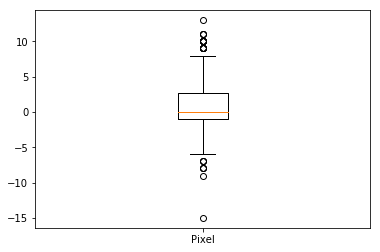

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot([X_train_afinn['pscore']],labels=["Pixel"])
plt.show()

In [256]:
print("Positive Polarity")
print("-"*50)
pos_pscore = 0
dfin = X_train_afinn.sort_values(by='pscore')
for index, row in dfin.iterrows():
    #print((row['tweet_text'], row['pscore']))
    if row['pscore']>0:
        row['pscore']=4
    #print("*"*50)
#pospol_score = pos_pscore/len(dataNov25fin)
#print(pospol_score)

Positive Polarity
--------------------------------------------------


In [257]:
dfin.head()

,text,pscore
1232253,I'm no longer gonna punch ppl in the face now ...,-15.0
528335,@davidwhittam That is HORRIBLE and you are evi...,-9.0
353285,@katiebug1112 HELLO! Nothing happened. Got an ...,-8.0
186095,There was a thunderstorm yesterday and my poor...,-8.0
583372,UGH I HATE THUNDERSTORMS OMG AND THERE WAS A T...,-8.0


In [230]:
print("Negative Polarity")
print("-"*50)
neg_pscore = 0
dataNov25fin = df.sort_values(by='pscore')
for index, row in dataNov25fin.iterrows():
    #print((row['tweet_text'], row['pscore']))
    if row['pscore']<0:
        row['pscore']=0
    #print("*"*50)
#negpol_score = neg_pscore/len(dataNov25fin)
#print(negpol_score)

Negative Polarity
--------------------------------------------------


In [231]:
df.shape

(6465, 3)

## Using textblob

In [4]:
trial = pd.read_csv("dataNov25final.csv", index_col=0)
trialtweet = trial

In [5]:
trialtweet = trial['tweet_text'].values

In [6]:
trialtweet[0]

'"All the pixel killers must be in church." - My husband as he\'s waiting for a que in blackops 4'

In [27]:
from textblob import TextBlob 

In [40]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [45]:
tweets = [] 
for tweet in trialtweet: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 
  
    # saving text of tweet 
    parsed_tweet['text'] = tweet
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet)
    tweets.append(parsed_tweet) 
  
    

In [48]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
# percentage of neutral tweets 
#print("Neutral tweets percentage: {} %".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 
  
# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text'])
# printing first 5 negative tweets
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 

Positive tweets percentage: 41.067285382830626 %
Negative tweets percentage: 14.215003866976025 %


Positive tweets:
"An obsession with pixel perfect rendering is futile."

555 เจ็บปวดแต่จริง
"Far away fields are greener, but Irishness runs deep"
First attempt at pixel art!

Let me know your opinions on it… https://t.co/jLzH4xTwmt
"I know not everyone can afford Paint and Aseprite, but worry not! #santria has got you covered for the most in-dep… https://t.co/jZ3gnHOK0c
"If you beat all the bonus stages you can get a super form and move super fast. Oh except you can still fall off th… https://t.co/PturN0hvcx
"Pixel Trapped: Halloween Fog" #FREE Today https://t.co/mVzfKbDnzo #books https://t.co/AGnTIrtHyl
"Staff Of Light" Pixel Art Animation by me. https://t.co/runTw4kBAR
"This looks like a cool game...right?"

#pixelart #pixel_art #pixelartist #pixel_artist #pixel #pixels https://t.co/STy4RDfdcV
"[Price mistake?] Pixel 3 and Pixel 3 XL glass screen protectors from Caseology are free rig

In [206]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
tbresult = [TextBlob(i).sentiment.polarity for i in X_test]
tbpred = [0 if n < 0 else 1 for n in tbresult]
conmat = np.array(confusion_matrix(y_test, tbpred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_test, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_test, tbpred))

Accuracy Score: 16.80%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                   0                   0
negative                  77                  42
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

          0       0.81      0.35      0.49       119
          1       0.00      0.00      0.00         0
          4       0.00      0.00      0.00       131

avg / total       0.38      0.17      0.23       250



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Supervised learning  - classification using emoticon

In [5]:
training = pd.read_csv("training.1600000.processed.noemoticon.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [77]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tv = TfidfVectorizer(min_df=50)
#X = tv.fit_transform(training['text'])

In [73]:
training.shape

(1600000, 3)

In [8]:
training.head()

,polarity,tid,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
training.polarity.value_counts()

4    800000
0    800000
Name: polarity, dtype: int64

In [17]:
training.drop(['tid','date','query','user'],axis=1,inplace=True)

In [19]:
training[training.polarity == 0].head(10)

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [20]:
training[training.polarity == 4].head(10)

,polarity,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [21]:
training['pre_clean_len'] = [len(t) for t in training.text]

In [22]:
df = training

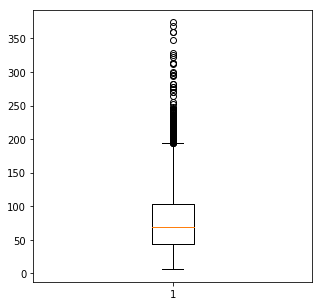

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [26]:
df[df.pre_clean_len > 140].head(10)

,polarity,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [29]:
# Decoding HTML to general text
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [30]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [32]:
# Remove '@’mention
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [42]:
# Remove URL links
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [34]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [40]:
# remove hashtag / numbers. Remove "#" and retain the text

df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [41]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [46]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped_text = soup.get_text()
    text_rmat = re.sub(r'@[A-Za-z0-9]+','', souped_text)
    text_rmurl = re.sub('https?://[A-Za-z0-9./]+','',text_rmat)
    text_rmwww = re.sub(r'www.[^ ]+','',text_rmurl)
    text_rmhash = re.sub("[^a-zA-Z]", " ", text_rmwww)
    text_lower = text_rmhash.lower()
    
    # tokenize and join together to remove unneccessary white spaces
    text_words = tok.tokenize(text_lower)
    return (" ".join(text_words)).strip()
testing = df.text[:10]
test_result = []
for t in testing:
    test_result.append(cleaner(t))
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera']

Below is the updated datacleaning function. The order of the cleaning is

- Souping
- BOM removing
- url address(‘http:’pattern), twitter ID removing
- url address(‘www.'pattern) removing
- lower-case
- removing numbers and special characters
- tokenizing and joining

In [52]:
# Check for null values
np.sum(training.isnull().any(axis=1))

0

In [53]:
#drop null values
training.dropna(inplace=True)
training.reset_index(drop=True,inplace=True)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
polarity         1600000 non-null int64
text             1600000 non-null object
pre_clean_len    1600000 non-null int64
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


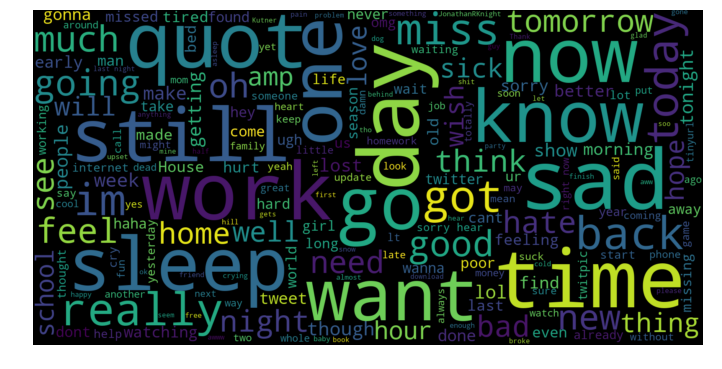

In [64]:
my_df = training[:1000]
neg_tweets = my_df[my_df.polarity == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [72]:
pos_tweets = my_df[my_df.polarity == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [11]:
X = training['text']
y = training['polarity']


In [14]:
X.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)
clf = SVC(kernel="linear", verbose=3)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=3)

In [81]:
tweet_tfidf = tv.transform(dataNov25fin['tweet_text'])

In [82]:
tweet_pred = clf.predict(tweet_tfidf)

In [83]:
dataNov25fin["sent_pred"] = tweet_pred

In [84]:
for index, row in dataNov25fin.head(50).iterrows():
    print((row['tweet_text'], row['sent_pred']))
    print("*"*50)

('RT @softedhearts: the signs as bitches\n\naries: tough bitch\ntaurus: stupid bitch\ngemini: resting bitch face bitch\ncancer: sensitive bitch\nle…', 0)
**************************************************
('@HQawiyy Nah it’s shit data. I was worried that it would fuck up my pixel data\n\nI already have 15,000+ View Content… https://t.co/rzomjFaZ94', 4)
**************************************************
("I FUCKING HATE THESE SOUNDS AND THESE PIXEL VOMIT HEADS\n\ni didn't kno i was playing a horror game", 0)
**************************************************
('@kissedbygravity I got an Android too, a Google Pixel XL specifically. I hate iPhones. Both their battery and storage fucking suck.', 0)
**************************************************
('If that stink bug on my window sill isn’t dead he probably high as hell', 0)
**************************************************
("@eclecticbrotha Sorry not sorry, I tuned him out.\nGoogle ain't updated this BS Pixel XL with the latest dumb fuck

## Using Pipeline and gridsearch

In [8]:
training = pd.read_csv("training.1600000.processed.noemoticon.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [9]:
#tv = TfidfVectorizer(min_df=50)
X = training['text']

In [10]:
X.shape

(1600000,)

In [11]:
y = training['polarity']

from sklearn.utils import shuffle

X, y = shuffle(X, y)

X, y = X[:50000], y[:50000]

In [12]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



In [13]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    ('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SVC()),  #let's use logistic regression
])

In [14]:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 500),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001),
    #'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__loss': ('log', 'hinge'),  #hinge linear SVM
    #'clf__max_iter': (2)
    #'clf__n_iter': (10, 50)
}

In [15]:
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)
#clf = SVC(kernel="linear", verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [81]:
tweet_tfidf = tv.transform(dataNov25fin['tweet_text'])

In [82]:
tweet_pred = clf.predict(tweet_tfidf)

In [83]:
dataNov25fin["sent_pred"] = tweet_pred

In [84]:
for index, row in dataNov25fin.head(50).iterrows():
    print((row['tweet_text'], row['sent_pred']))
    print("*"*50)

('RT @softedhearts: the signs as bitches\n\naries: tough bitch\ntaurus: stupid bitch\ngemini: resting bitch face bitch\ncancer: sensitive bitch\nle…', 0)
**************************************************
('@HQawiyy Nah it’s shit data. I was worried that it would fuck up my pixel data\n\nI already have 15,000+ View Content… https://t.co/rzomjFaZ94', 4)
**************************************************
("I FUCKING HATE THESE SOUNDS AND THESE PIXEL VOMIT HEADS\n\ni didn't kno i was playing a horror game", 0)
**************************************************
('@kissedbygravity I got an Android too, a Google Pixel XL specifically. I hate iPhones. Both their battery and storage fucking suck.', 0)
**************************************************
('If that stink bug on my window sill isn’t dead he probably high as hell', 0)
**************************************************
("@eclecticbrotha Sorry not sorry, I tuned him out.\nGoogle ain't updated this BS Pixel XL with the latest dumb fuck

## SGDClassifier

# Visualizations

In [174]:
my_df = df[:1000]
neg_tweets = my_df[my_df.polarity == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'polarity'

In [72]:
pos_tweets = my_df[my_df.polarity == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas